<a href="https://colab.research.google.com/github/afiorg9000/WOMXN-GENAI-HACK/blob/main/Enclothed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -q https://gist.githubusercontent.com/FurkanGozukara/be7be5f9f7820d0bb85a3052874f184e/raw/d8d179da6cab0735bd5832029c2dec5163db87b4/train_dreambooth.py
!wget -q https://github.com/ShivamShrirao/diffusers/raw/main/scripts/convert_diffusers_to_original_stable_diffusion.py
!pip uninstall torchtext --yes
!pip install -qq git+https://github.com/ShivamShrirao/diffusers
!pip install torch==2.2.0 torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121 --upgrade
!pip install -q -U --pre triton --upgrade
!pip install -q accelerate transformers ftfy gradio natsort safetensors
!pip install bitsandbytes==0.41.3 --upgrade
!pip install xformers==0.0.24 --upgrade
!pip install triton==2.2.0 --upgrade
!pip install "jax[cuda12_local]==0.4.23" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html




  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Looking in indexes: https://download.pytorch.org/whl/cu121
  Using cached https://download.pytorch.org/whl/cu121/torchvision-0.18.1%2Bcu121-cp310-cp310-linux_x86_64.whl (7.0 MB)
  Using cached https://download.pytorch.org/whl/cu121/torchaudio-2.3.1%2Bcu121-cp310-cp310-linux_x86_64.whl (3.4 MB)
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
  Using cached https://download.pytorch.org/whl/cu121/torchvision-0.18.0%2Bcu121-cp310-cp310-linux_x86_64.whl (7.0 MB)
  Using cached https://download.pytorch.org/whl/cu121/torchvision-0.17.2%2Bcu121-cp310-cp310-linux_x86_64.whl (7.0 MB)
  Using cached https://download.pytorch.org/whl/cu121/torchvision-0.17.1%2Bcu121-cp310-cp310-linux_x86_64.whl (7.0 MB)
INFO: pip is looking at multiple versions of torchaudio to determ

In [ ]:
import torch
from diffusers import StableDiffusionPipeline, ControlNetModel
from PIL import Image
import requests
from io import BytesIO


In [2]:
#@markdown If model weights should be saved directly in google drive (takes around 4-5 GB).
save_to_gdrive = True #@param {type:"boolean"}
if save_to_gdrive:
    from google.colab import drive
    drive.mount('/content/drive')

#@markdown Name/Path of the initial model.
MODEL_NAME = "runwayml/stable-diffusion-v1-5" #@param {type:"string"}

#@markdown Enter the directory name to save model at.
OUTPUT_DIR = "stable_diffusion_weights/ohwx" #@param {type:"string"}
if save_to_gdrive:
    OUTPUT_DIR = "/content/drive/MyDrive/" + OUTPUT_DIR
else:
    OUTPUT_DIR = "/content/" + OUTPUT_DIR

print(f"[*] Weights will be saved at {OUTPUT_DIR}")
!mkdir -p $OUTPUT_DIR


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[*] Weights will be saved at /content/drive/MyDrive/stable_diffusion_weights/ohwx


Add `--gradient_checkpointing` flag for around 9.92 GB VRAM usage.

remove `--use_8bit_adam` flag for full precision. Requires 15.79 GB with `--gradient_checkpointing` else 17.8 GB.

remove `--train_text_encoder` flag to reduce memory usage further, degrades output quality.

In [3]:
# You can also add multiple concepts here. Try tweaking `--max_train_steps` accordingly.

concepts_list = [
    {
        "instance_prompt":      "sofiendez_512x512 woman",
        "class_prompt":         "full body photo of woman",
        "instance_data_dir":    "/content/data/sofiendez_512x512",
        "class_data_dir":       "/content/data/woman"
    },
#     {
#         "instance_prompt":      "photo of ukj person",
#         "class_prompt":         "photo of a person",
#         "instance_data_dir":    "/content/data/ukj",
#         "class_data_dir":       "/content/data/person"
#     }
]

# `class_data_dir` contains regularization images
import json
import os
for c in concepts_list:
    os.makedirs(c["instance_data_dir"], exist_ok=True)

with open("concepts_list.json", "w") as f:
    json.dump(concepts_list, f, indent=4)

In [4]:
#@markdown Upload your images by running this cell.

#@markdown OR

#@markdown You can use the file manager on the left panel to upload (drag and drop) to each `instance_data_dir` (it uploads faster). You can also upload your own class images in `class_data_dir` if u don't wanna generate with SD.

import os
from google.colab import files
import shutil

for c in concepts_list:
    print(f"Uploading instance images for `{c['instance_prompt']}`")
    uploaded = files.upload()
    for filename in uploaded.keys():
        dst_path = os.path.join(c['instance_data_dir'], filename)
        shutil.move(filename, dst_path)

Uploading instance images for `sofiendez_512x512 woman`


Saving sofiendez_5120512.jpeg to sofiendez_5120512.jpeg
Saving sofiendez_5121512.jpeg to sofiendez_5121512.jpeg
Saving sofiendez_5122512.jpeg to sofiendez_5122512.jpeg
Saving sofiendez_5123512.jpeg to sofiendez_5123512.jpeg
Saving sofiendez_5124512.jpeg to sofiendez_5124512.jpeg
Saving sofiendez_5125512.jpeg to sofiendez_5125512.jpeg
Saving sofiendez_5126512.jpeg to sofiendez_5126512.jpeg
Saving sofiendez_5127512.jpeg to sofiendez_5127512.jpeg
Saving sofiendez_5128512.jpeg to sofiendez_5128512.jpeg
Saving sofiendez_5129512.jpeg to sofiendez_5129512.jpeg
Saving sofiendez_51210512.jpeg to sofiendez_51210512.jpeg
Saving sofiendez_51211512.jpeg to sofiendez_51211512.jpeg
Saving sofiendez_51212512.jpeg to sofiendez_51212512.jpeg
Saving sofiendez_51213512.jpeg to sofiendez_51213512.jpeg
Saving sofiendez_51214512.jpeg to sofiendez_51214512.jpeg
Saving sofiendez_51215512.jpeg to sofiendez_51215512.jpeg
Saving sofiendez_51216512.jpeg to sofiendez_51216512.jpeg
Saving sofiendez_51217512.jpeg to 

In [5]:
!python3 train_dreambooth.py \
  --pretrained_model_name_or_path=$MODEL_NAME \
  --pretrained_vae_name_or_path="stabilityai/sd-vae-ft-mse" \
  --output_dir=$OUTPUT_DIR \
  --revision="fp16" \
  --with_prior_preservation --prior_loss_weight=1.0 \
  --seed=1337 \
  --resolution=512 \
  --train_batch_size=1 \
  --train_text_encoder \
  --mixed_precision="fp16" \
  --use_8bit_adam \
  --gradient_accumulation_steps=1 \
  --learning_rate=1e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=256 \
  --num_class_images=50 \
  --sample_batch_size=4 \
  --max_train_steps=2560 \
  --save_interval=10000 \
  --save_sample_prompt="photo sofiendez_512x512 woman" \
  --concepts_list="concepts_list.json"

# Reduce the `--save_interval` to lower than `--max_train_steps` to save weights from intermediate steps.
# `--save_sample_prompt` can be same as `--instance_prompt` to generate intermediate samples (saved along with weights in samples directory).

2024-06-24 23:15:25.039411: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-24 23:15:25.039460: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-24 23:15:25.148368: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-24 23:15:27.418545: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, u

In [6]:
WEIGHTS_DIR = "" #@param {type:"string"}
if WEIGHTS_DIR == "":
    from natsort import natsorted
    from glob import glob
    import os
    WEIGHTS_DIR = natsorted(glob(OUTPUT_DIR + os.sep + "*"))[-1]
print(f"[*] WEIGHTS_DIR={WEIGHTS_DIR}")

[*] WEIGHTS_DIR=/content/drive/MyDrive/stable_diffusion_weights/ohwx/2560


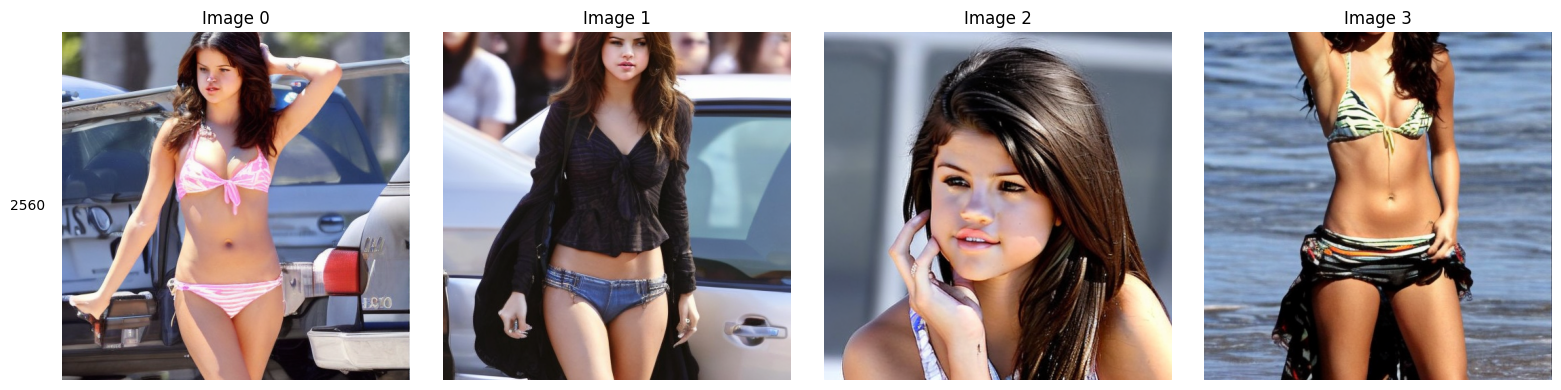

In [7]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

weights_folder = OUTPUT_DIR
folders = sorted([f for f in os.listdir(weights_folder) if f != "0"], key=lambda x: int(x))

row = len(folders)
col = len(os.listdir(os.path.join(weights_folder, folders[0], "samples")))
scale = 4
fig, axes = plt.subplots(row, col, figsize=(col*scale, row*scale), gridspec_kw={'hspace': 0, 'wspace': 0})

for i, folder in enumerate(folders):
    folder_path = os.path.join(weights_folder, folder)
    image_folder = os.path.join(folder_path, "samples")
    images = [f for f in os.listdir(image_folder)]
    for j, image in enumerate(images):
        if row == 1:
            currAxes = axes[j]
        else:
            currAxes = axes[i, j]
        if i == 0:
            currAxes.set_title(f"Image {j}")
        if j == 0:
            currAxes.text(-0.1, 0.5, folder, rotation=0, va='center', ha='center', transform=currAxes.transAxes)
        image_path = os.path.join(image_folder, image)
        img = mpimg.imread(image_path)
        currAxes.imshow(img, cmap='gray')
        currAxes.axis('off')

plt.tight_layout()
plt.savefig('grid.png', dpi=72)

In [8]:
#@markdown Run conversion.
ckpt_path = WEIGHTS_DIR + "/model.ckpt"

half_arg = ""
#@markdown  Whether to convert to fp16, takes half the space (2GB).
fp16 = True #@param {type: "boolean"}
if fp16:
    half_arg = "--half"
!python convert_diffusers_to_original_stable_diffusion.py --model_path $WEIGHTS_DIR  --checkpoint_path $ckpt_path $half_arg
print(f"[*] Converted ckpt saved at {ckpt_path}")

[*] Converted ckpt saved at /content/drive/MyDrive/stable_diffusion_weights/ohwx/2560/model.ckpt


In [11]:
import torch
from torch import autocast
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, DDIMScheduler
from PIL import Image
from IPython.display import display
import os
from google.colab import files
import shutil

# Function to preprocess the input image
def preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image = image.resize((512, 512))
    return image

# Upload your clothing image
print("Upload the clothing image:")
uploaded = files.upload()

clothing_image_path = list(uploaded.keys())[0]
shutil.move(clothing_image_path, "/content/" + clothing_image_path)
clothing_image_path = "/content/" + clothing_image_path

# Preprocess the uploaded image
clothing_image = preprocess_image(clothing_image_path)



Upload the clothing image:


Saving woman_redDress_frontside.jpg to woman_redDress_frontside (1).jpg


In [13]:
# Load the pretrained Stable Diffusion model and ControlNet
model_path = '/content/drive/MyDrive/stable_diffusion_weights/ohwx/2560' # Replace with the path to your model

controlnet_model_id = "fusing/stable-diffusion-v1-5-controlnet-canny"  # Adjust to the correct model ID if different
controlnet = ControlNetModel.from_pretrained(controlnet_model_id).to("cuda")

# Load the pipeline with additional parameters
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    model_path,
    controlnet=controlnet,
    safety_checker=None,
    torch_dtype=torch.float16,
    low_cpu_mem_usage=False  # Ensure this parameter is set
).to("cuda")

pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
pipe.enable_xformers_memory_efficient_attention()



Some weights of the model checkpoint at /content/drive/MyDrive/stable_diffusion_weights/ohwx/2560/vae were not used when initializing AutoencoderKL: ['encoder.mid_block.attentions.0.to_q.weight', 'encoder.mid_block.attentions.0.to_out.0.weight', 'decoder.mid_block.attentions.0.to_v.weight', 'encoder.mid_block.attentions.0.to_k.bias', 'decoder.mid_block.attentions.0.to_out.0.weight', 'decoder.mid_block.attentions.0.to_k.bias', 'encoder.mid_block.attentions.0.to_v.bias', 'encoder.mid_block.attentions.0.to_q.bias', 'decoder.mid_block.attentions.0.to_k.weight', 'decoder.mid_block.attentions.0.to_out.0.bias', 'encoder.mid_block.attentions.0.to_v.weight', 'decoder.mid_block.attentions.0.to_q.weight', 'encoder.mid_block.attentions.0.to_k.weight', 'encoder.mid_block.attentions.0.to_out.0.bias', 'decoder.mid_block.attentions.0.to_q.bias', 'decoder.mid_block.attentions.0.to_v.bias']
- This IS expected if you are initializing AutoencoderKL from the checkpoint of a model trained on another task or

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['biometrics data : age : 3 1 body height : 1 6 0 cm body weight : 6 5 kg chest measurement : 3 4 - 3 6 inch ( medium ) waist measurement : 2 6 - 2 8 inch ( medium ) hip measurement : 3 5 - 3 7 inch ( small )']


  0%|          | 0/50 [00:00<?, ?it/s]

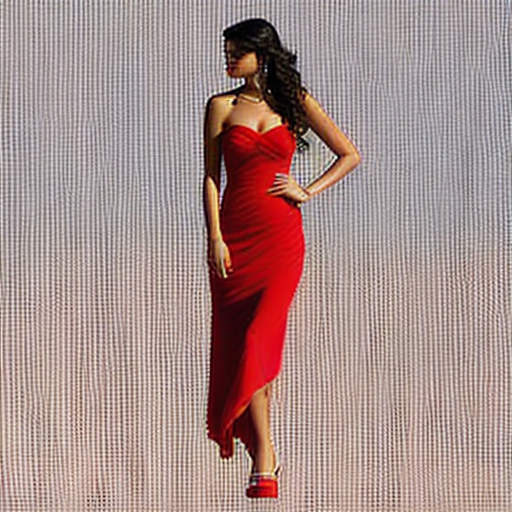

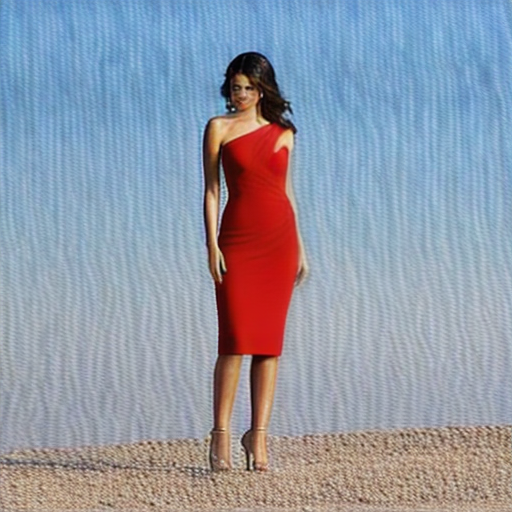

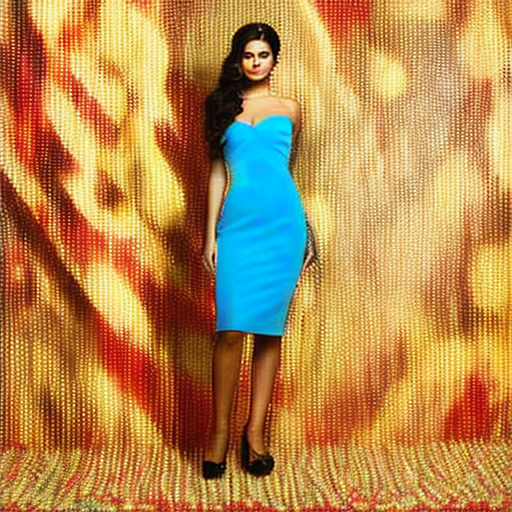

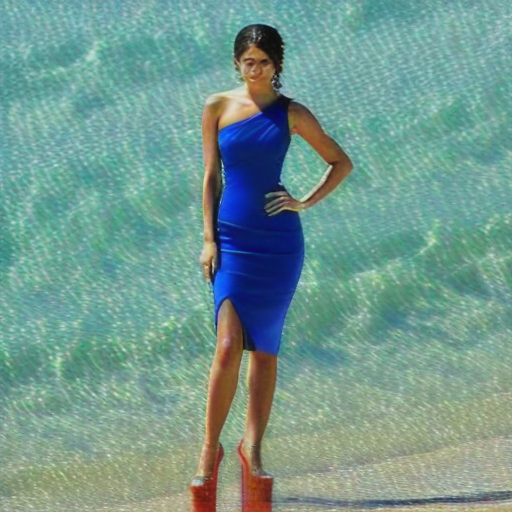

In [25]:
# Set the seed for reproducibility
g_cuda = torch.Generator(device='cuda')
seed = 52362 #@param {type:"number"}
g_cuda.manual_seed(seed)

# Define the prompt and other parameters
prompt = (
    "A photo of sofiendez_512x512 woman wearing a one-shoulder red dress, "
    "The dress is "
    "form-fitting and elegant, Best quality, ultra high res, "
    "detailed body, highly realistic, sharp, elegant, "
    "looking into the camera, professional, soft light."
)
negative_prompt = (
    "bad anatomy, bw, black and white, ugly, tiling, poorly drawn hands, poorly drawn feet, "
    "poorly drawn face, out of frame, extra limbs, disfigured, deformed, body out of frame, "
    "blurry, bad anatomy, blurred, poorly rendered face, poorly drawn face, bad composition, "
    "disfigured, mutated body parts, oversaturated, deformed body features, poorly drawn hands, "
    "low resolution, images cut out at the top, left, right, bottom, no back shot, no head shot only, "
    "wrong dress color, wrong clothing item, multiple dresses, incorrect dress style"
)
num_samples = 4 #@param {type:"number"}
guidance_scale = 7.5 #@param {type:"number"}
num_inference_steps = 50 #@param {type:"number"}
height = 512 # @param {type:"number"}
width = 512 #@param {type:"number"}
age = "31" # @param {type:"string"}
body_height = "160 cm" # @param {type:"string"}
body_weight = "65 kg" # @param {type:"string"}
chest_measurement = "34 -36 inch (Medium)" # @param ["30-32 in (Extra Small)", "32-34 inch (Small)", "34 -36 inch (Medium)", "36-38 inch (Large)", "39-41 inch (Extra Large)", "42-46 inch (1X)", "46-50 inch (2X)", "50-54 inch (3X)"]
waist_measurement = "26-28 inch (Medium)" # @param ["22-24 inch (Extra Small)", "24-26 inch (Small)", "26-28 inch (Medium)", "28-30 inch (Large)", "30-33 inch (Extra Large)", "33-39 inch (1X)", "39-43 inch (2X)", "43-47 inch (3X)"]
hip_measurement = "35-37 inch (Small)" # @param ["32-34 inch (Extra Small)", "35-37 inch (Small)", "37-39 inch (Medium)", "39-41 inch (Large)", "41-43 inch (Extra Large)", "45-49 inch (1X)", "49-53 inch (2X)", "53-57 inch (3X)"]

prompt += (
    f" with image size: height: {height} width: {width} and give the biometrics data: "
    f"age: {age} body height: {body_height} body weight: {body_weight} chest measurement: "
    f"{chest_measurement} waist measurement: {waist_measurement} hip measurement: {hip_measurement}"
)

# Generate images using the pipeline
with autocast("cuda"), torch.inference_mode():
    images = pipe(
        prompt,
        height=height,
        width=width,
        negative_prompt=negative_prompt,
        num_images_per_prompt=num_samples,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
        generator=g_cuda,
        image=clothing_image  # Add ControlNet image
    ).images

for img in images:
    display(img)



In [ ]:
#@title Free runtime memory
exit()